In [2]:
import pandas as pd

In [3]:
"""
Data inlezen, gebruik pandas.read_csv
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
"""

df = pd.read_csv('data\\elementen_data.txt') # df staat voor dataframe

# Kijken wat er word ingelezen.
df.head()

,#protonen mass nucleonen
0,1 1.007825 1
1,2 4.002603 4
2,3 7.016005 7
3,4 9.012182 9
4,5 11.009305 11


In [4]:
"""
Het lijkt er op dat alles in 1 kolom zit, dit is niet de bedoeling.
Klopt dit? 
"""

df.columns

Index(['#protonen mass nucleonen'], dtype='object')

In [5]:
# Inderdaad, alles zit in 1 kolom. 
# Wellicht heeft pandas niet het juiste scheidingsteken.

# Lees data in met spatie als scheidingsteken
df = pd.read_csv('data\\elementen_data.txt', delimiter=' ') 

In [6]:
# Kijk welke data we hebben
df.head()

,#protonen,mass,nucleonen
0,1,1.007825,1
1,2,4.002603,4
2,3,7.016005,7
3,4,9.012182,9
4,5,11.009305,11


In [7]:
"""
En jawel, de data is nu correct ingelezen.
Wel zijn de kolom namen nog niet fijn om mee te werken.
Na even googlen is duidelijk hoe je dit veranderd:
https://stackoverflow.com/questions/11285613/selecting-columns-in-a-pandas-dataframe

Of gewoon de kolomnamen in elementen_data.txt wijzigen...
"""

# Let op dat 'df = ...' nodig is om daadwerkelijk ook effect te hebben.
df = df.rename(columns={'#protonen':'Z','mass':'m','nucleonen':'N'})
df.head()

,Z,m,N
0,1,1.007825,1
1,2,4.002603,4
2,3,7.016005,7
3,4,9.012182,9
4,5,11.009305,11


In [8]:
# Wellicht een kortere manier om al het bovenstaande te doen is:
df = pd.read_csv('data\\elementen_data.txt', sep=' ', header=1, names=['Z', 'm', 'N'], decimal=".")
df.head()

,Z,m,N
0,2,4.002603,4
1,3,7.016005,7
2,4,9.012182,9
3,5,11.009305,11
4,6,12.000000,12


In [9]:
"""
Formule opstellen om bindingsenergie E op te stellen.
Vervolgends deze uitrekenen dmv pandas.
"""
n = 1.008665  # massa neutron  [u]
H = 1.007825  # massa waterstof-1 [u]
df['E'] = (((df['Z']*H)+((df['N']-df['Z'])*n)+(df['m']*-1))*931.5)/df['N']

df.head()

,Z,m,N,E
0,2,4.002603,4,7.074044
1,3,7.016005,7,5.606299
2,4,9.012182,9,6.462850
3,5,11.009305,11,6.927820
4,6,12.000000,12,7.680217


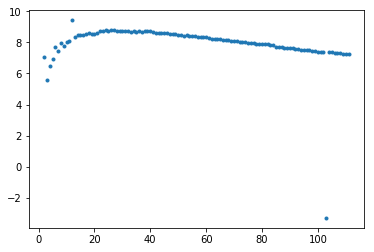

In [10]:
"""
Klopt het ongeveer wat we hebben?
Plot het.
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Z'], df['E'], '.') # Deze code laat de plot in notebooks zien (html versie)

<IPython.core.display.Javascript object>


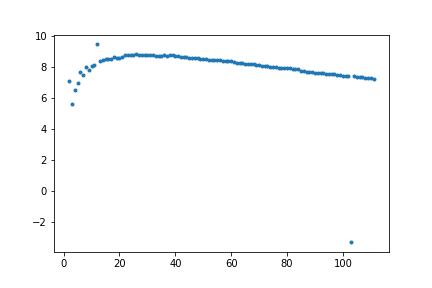

'\nEr is te zien dat het berekende overeenkomt met de verwachting.\nNu moet de plot nog conform het rapportage journaal gemaakt worden.\n'

In [12]:
"""
Interactieve plot is wel fijn, even googlen laat zien hoe dit moet:
https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook
"""
%matplotlib notebook
plt.plot(df['Z'], df['E'], '.')

"""
Er is te zien dat het berekende overeenkomt met de verwachting.
Nu moet de plot nog conform het rapportage journaal gemaakt worden.
"""

In [13]:
"""
Voor correcte significatie van de assen is TISTNplot nodig:
"""

import TISTNplot as tn

De module bestaat niet, wat nu?
Normaliter installeren via pip, maar TISTNplot zit hier niet in.
Direct van github halen dus:
https://github.com/ddland/TIS-TN-python-code
-> 'Clone or download' , zip downloaden & uitpakken.

Waar zet je de inhoud van de gedownloade folder neer?
dus de inhoud van 'TIS-TN-python-code-master'.
Open cmd en typ 'where python'
Conclusie:
C:\Program Files\Python36\python.exe

En wel in de folder:

C:\Program Files\Python36\Lib\site-packages

(Kopieer hier de inhoud van 'TIS-TN-python-code-master' naar toe)

Vergeet niet Python opnieuw te starten.

In [15]:
def correcte_opmaak():
    """
    Zorgt voor de correcte opmaak van de plot.
    """
    tn.PRECISION_X = 3
    tn.PRECISION_Y = 3
    tn.fix_axis(plt.gca())
    plt.tight_layout()
    plt.legend(loc=0)
    plt.grid()

<IPython.core.display.Javascript object>


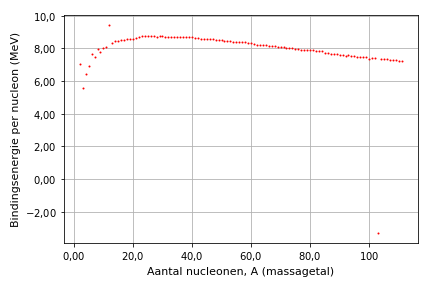

In [16]:
plt.plot(df['Z'], df['E'], '.', color="#ff0000", ms=2)
plt.xlabel('Aantal nucleonen, A (massagetal)', fontsize='11', color='black')
plt.ylabel('Bindingsenergie per nucleon (MeV)', fontsize='11', color='black')
correcte_opmaak()

# Slechts 1 data set dus legenda niet nodig.  Controleren met rapportage journaal
plt.legend().remove()

<IPython.core.display.Javascript object>


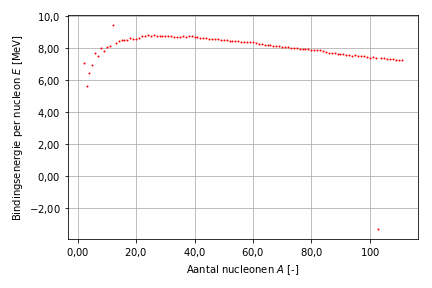

In [20]:
"""
Maar de as labels zijn nog niet correct.
Uiteraard willen we hier LaTeX voor gebruiken. 
Hoe? Zie: https://matplotlib.org/users/usetex.html
"""
plt.clf() # clear frame (plot leeg maken, nu zijn alle voorgaande zeker weten weg uit het figuur)
plt.plot(df['Z'], df['E'], '.', color="#ff0000", ms=2)
plt.xlabel('Aantal nucleonen $A$ [-]',color='black')
plt.ylabel('Bindingsenergie per nucleon $E$ [MeV]',color='black')
correcte_opmaak()

# Slechts 1 data set dus legenda niet nodig.  Controleren met rapportage journaal
plt.legend().remove()


In [21]:
# Dit ziet er correct uit, tijd om op te slaan

plt.savefig('figuren\\bindingsenergie_per_nucleon.png', dpi=500, bbox_inches='tight')

<b>Nu even de nette versie</b>

<IPython.core.display.Javascript object>


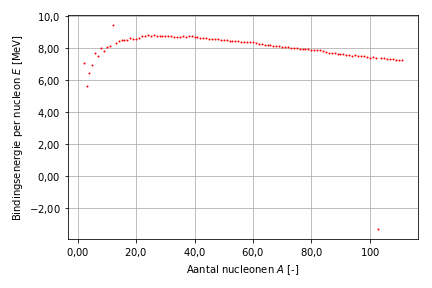

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import TISTNplot as tn

# data inlezen
df = pd.read_csv('data\\elementen_data.txt', sep=' ', header=1, names=['Z', 'm', 'N'], decimal=".")

# Bindingsenergie E per nucleon berekenen.
n = 1.008665  # massa neutron  [u]
H = 1.007825  # massa waterstof-1 [u]
df['E'] = (((df['Z']*H)+((df['N']-df['Z'])*n)+(df['m']*-1))*931.5)/df['N']

# standaard functie voor de correcte opmaak, let wel op juist gekozen significantie.
def correcte_opmaak():
    """
    Zorgt voor de correcte opmaak van de plot.
    """
    tn.PRECISION_X = 3
    tn.PRECISION_Y = 3
    tn.fix_axis(plt.gca())
    plt.tight_layout()
    plt.legend(loc=0)
    plt.grid()

# Maak de plot 
plt.clf() # clear frame (plot leeg maken, nu zijn alle voorgaande zeker weten weg uit het figuur)
plt.plot(df['Z'], df['E'], '.', color="#ff0000", ms=2)
plt.xlabel('Aantal nucleonen $A$ [-]',color='black')
plt.ylabel('Bindingsenergie per nucleon $E$ [MeV]',color='black')
correcte_opmaak()

# Slechts 1 data set dus legenda niet nodig.  Controleren met rapportage journaal?
plt.legend().remove()

# plot opslaan
plt.savefig('figuren\\bindingsenergie_per_nucleon.png', dpi=500, bbox_inches='tight')